In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns


In [4]:
# print a1 WGFMU
def plot_WGFMU(file_path="A:\\project\\OECT\\b1500a\\2024_4_24\\1.xlsx", start=13, r=0.5, mode=' '):
    df = pd.read_excel(file_path)
    all = len(df) - start
    x1 = df.iloc[start:int(r*all),1]
    y1 = df.iloc[start:int(r*all),2]
    y2 = df.iloc[start:int(r*all),3]


    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(x1, y1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Vg', color='C0')
    ax1.invert_yaxis()
    
    if mode == 'seperate':
        # new figure and axis
        fig, ax2 = plt.subplots(figsize=(14, 6))
    else:
        ax2 = ax1.twinx()
    ax2.plot(x1, y2, 'C1')
    ax2.set_ylabel('Id', color='C1')
    ax2.invert_yaxis()

    plt.show()

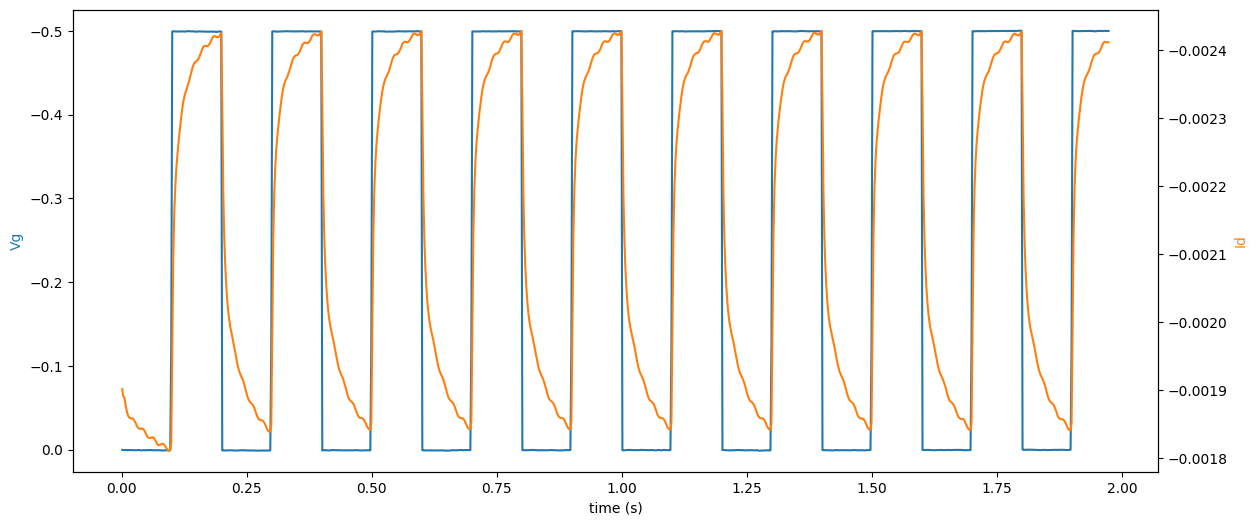

In [159]:
plot_WGFMU('A:\\project\\OECT\\b1500a\\2024_4_24\\1.xlsx')

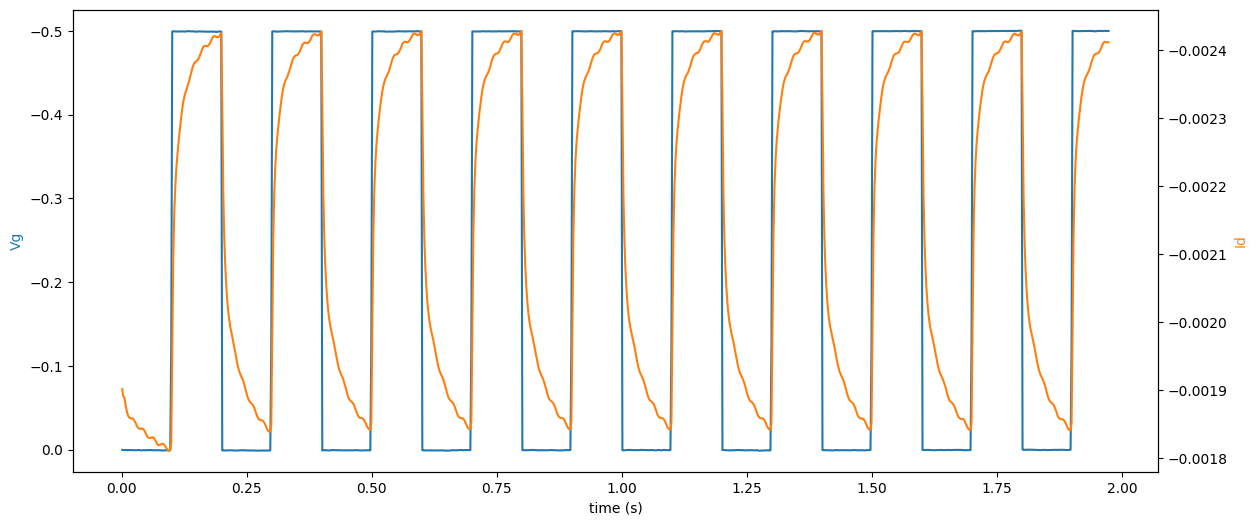

In [76]:
# 开关循环测试
plot_WGFMU()


C:\Users\cmx\AppData\Local\Temp\ipykernel_17784\62109248.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Blues')


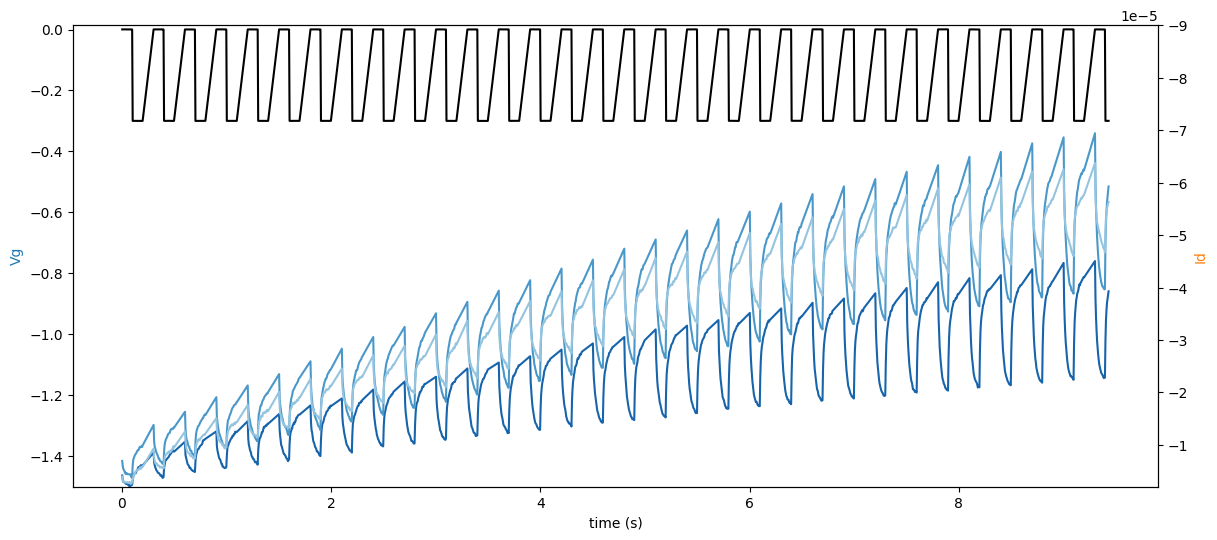

In [199]:

def t(file_path="A:\\project\\OECT\\b1500a\\2024_4_24\\width\\80ms.xlsx", start=13, r=1, mode=' '):
    df = pd.read_excel(file_path)
    df2 = pd.read_excel("A:\\project\\OECT\\b1500a\\2024_4_24\\width\\70ms.xlsx")
    all = len(df) - start
    x1 = df.iloc[start:int(r*all),1]
    y1 = df.iloc[start:int(r*all),2]
    y2 = df.iloc[start:int(r*all),3]
    y3 = df2.iloc[start:int(r*all),3]
    df2 = pd.read_excel("A:\\project\\OECT\\b1500a\\2024_4_24\\width\\40ms.xlsx")
    y4 = df2.iloc[start:int(r*all),3]
    
    # cmap rocket 指定为colors
    colors = cm.get_cmap('Blues') 
    

    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(x1, y1, color ='black')
    ax1.set_ylim(-1.5)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Vg', color='C0')
    

    
    if mode == '  ':
        # new figure and axis
        fig, ax2 = plt.subplots(figsize=(14, 6))
    else:
        ax2 = ax1.twinx()
    
    ax2.set_ylim(min(y2)*2, max(y2))
    ax2.plot(x1, y2, color = colors(0.8))
    ax2.set_ylabel('Id', color='C1')
    ax2.plot(x1, y3,color = colors(0.6))
    ax2.plot(x1, y4, color = colors(0.4))
    ax2.invert_yaxis()    

    plt.show()
t()

In [26]:
# 处理s4c2的电导更新数据（提取NGP），首先确定每一次的G0，然后计算更新的幅度，并提供百分比
# 电流转换为电导，单位先采用S（but too big）
# 读取数据
pulse = [20,40,60,70,80,90,120]
# pulse = [20,80,120]
dfs = [pd.read_excel(f"A:\\project\\OECT\\b1500a\\2024_4_24\\width\\{i}ms.xlsx") for i in pulse]
r=1
all = len(dfs[0]) 
x1 = dfs[0].iloc[13:int(r*all),1].tolist()
y1 = dfs[0].iloc[13:int(r*all),2].tolist()
Is = [df.iloc[13:int(r*all),3].tolist() for df in dfs]
# 找到NGP结束的点
def get_endNGP(v):
    new_idx = []
    for i in range(1,len(v)-1):
        if v[i-1] > -0.2 and v[i+1] < -0.2 and v[i] > -0.2:
            new_idx.append(i)
    return new_idx
new_idx = get_endNGP(y1)   
# plot
colors = cm.get_cmap('plasma')
fig, ax1 = plt.subplots(figsize=(14, 10))
ax2 = ax1.twinx()
ax2.plot(x1, y1, color = '#D5CDCB')
ax2.scatter([x1[i] for i in new_idx], [y1[i] for i in new_idx], color='red')
states = []
for i in range(len(pulse)):
    ax1.plot(x1, Is[i], color = colors(0.1*i), linewidth=1)
    ax1.invert_yaxis()
    # plot NGP end
    ax1.scatter([x1[t] for t in new_idx], [Is[i][t] for t in new_idx], color='red')
    # save the 32 states conducdance
    states.append([Is[i][t] for t in new_idx])

plt.show()
df_states = pd.DataFrame()
for i in range(len(pulse)):
    df_states[f'{pulse[i]}ms'] = states[i]
df_states.to_csv('./s4c2_states_in_diff_pulse.csv_')

TypeError: 'Series' object is not callable

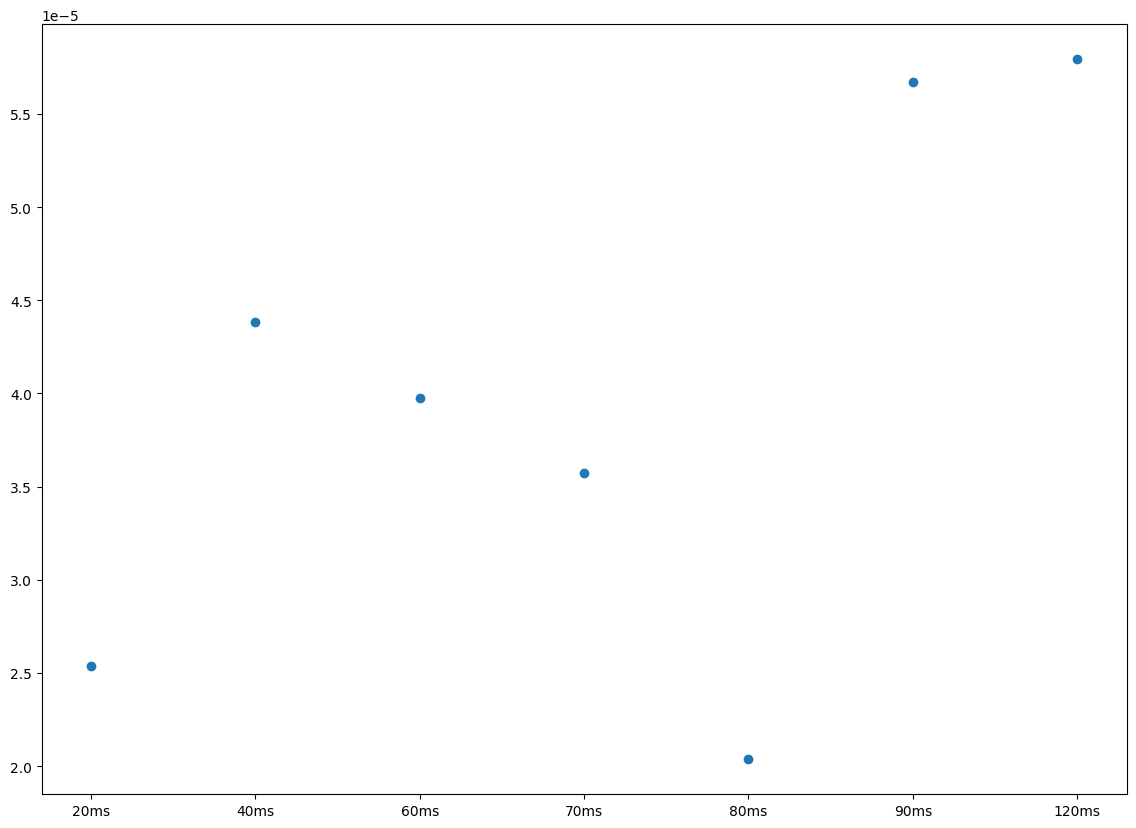

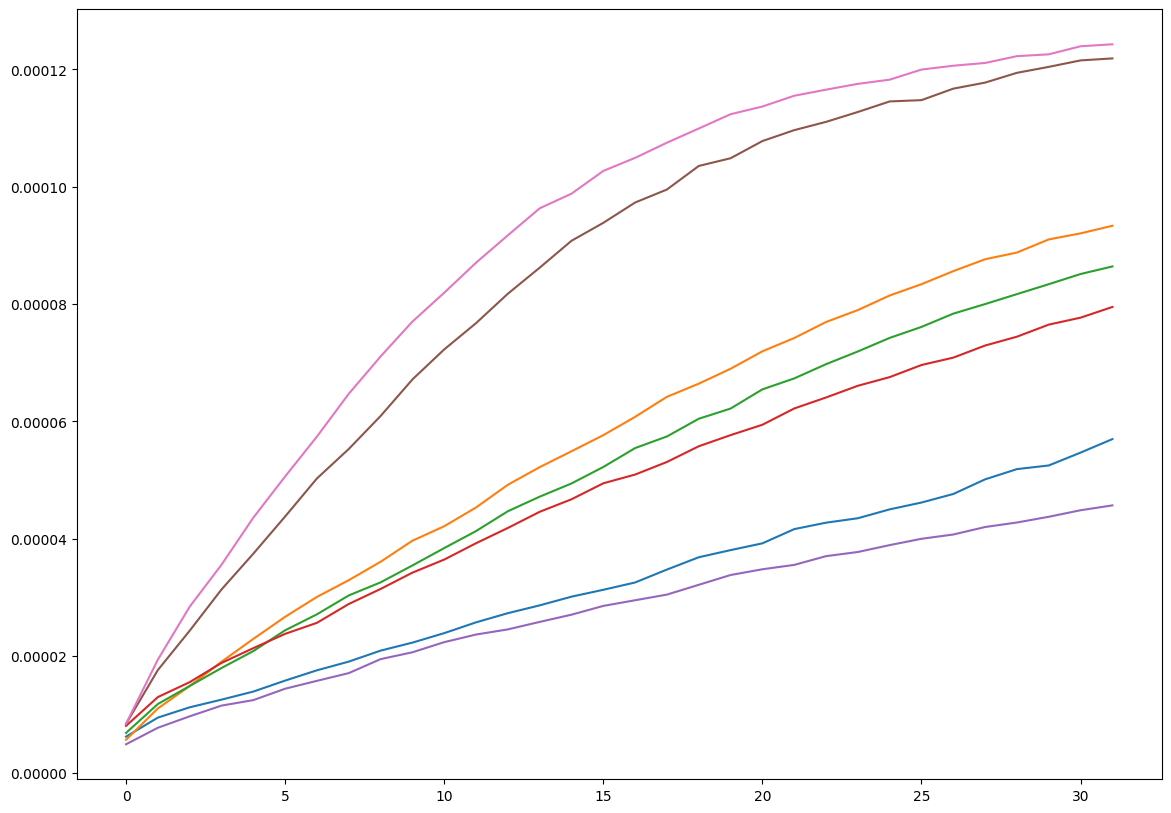

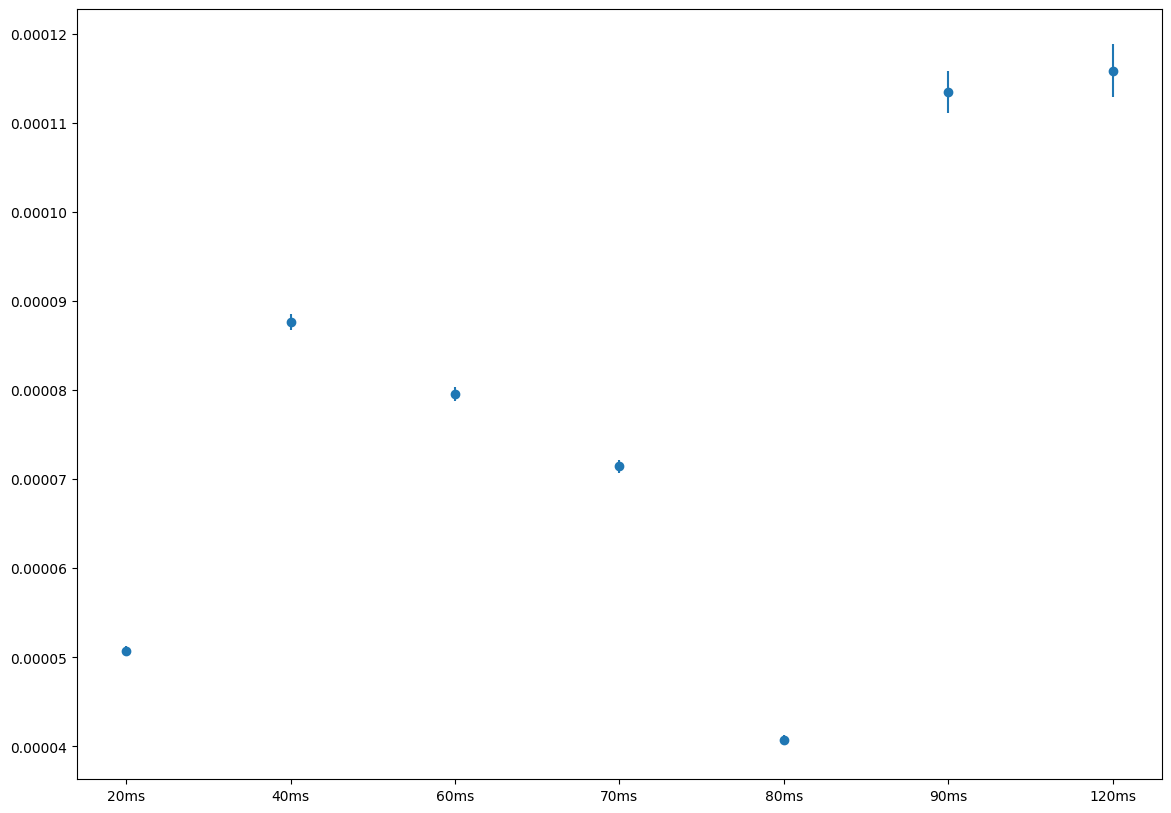

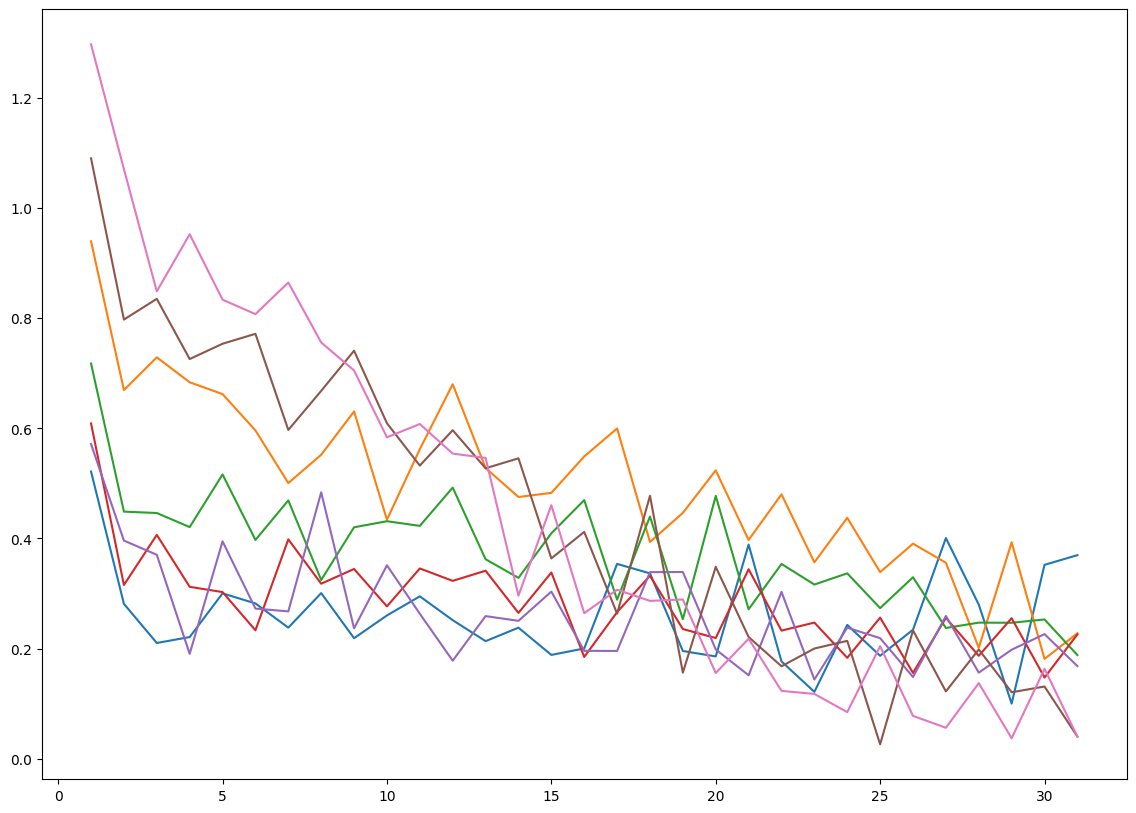

In [22]:
# 对上一个处理完的数据进行进一步处理并绘制图像
states = pd.read_csv('./s4c2_states_in_diff_pulse.csv')
states = states.drop(columns=['Unnamed: 0'])
plt.figure(figsize=(14, 10))
plt.errorbar(x=states.columns, y=range, fmt='o')
# 每一个数据都除以-0.5, 高精度计算
states = states / -0.5
# 计算每次的增加量
states_diff = states.diff()
# 计算每次的增加量占该列初始值的百分比
states_diff_percnet = states_diff / states.iloc[0]


plt.figure(figsize=(14, 10))
plt.plot(states)
plt.figure(figsize=(14, 10) )
means = states_diff.mean()
std = states_diff.std()
ranges = states.max() - states.min()
plt.errorbar(x=states.columns, y=ranges, yerr=std, fmt='o')
plt.figure(figsize=(14, 10))
plt.plot(states_diff_percnet)

C:\Users\cmx\AppData\Local\Temp\ipykernel_33204\797681864.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('plasma')


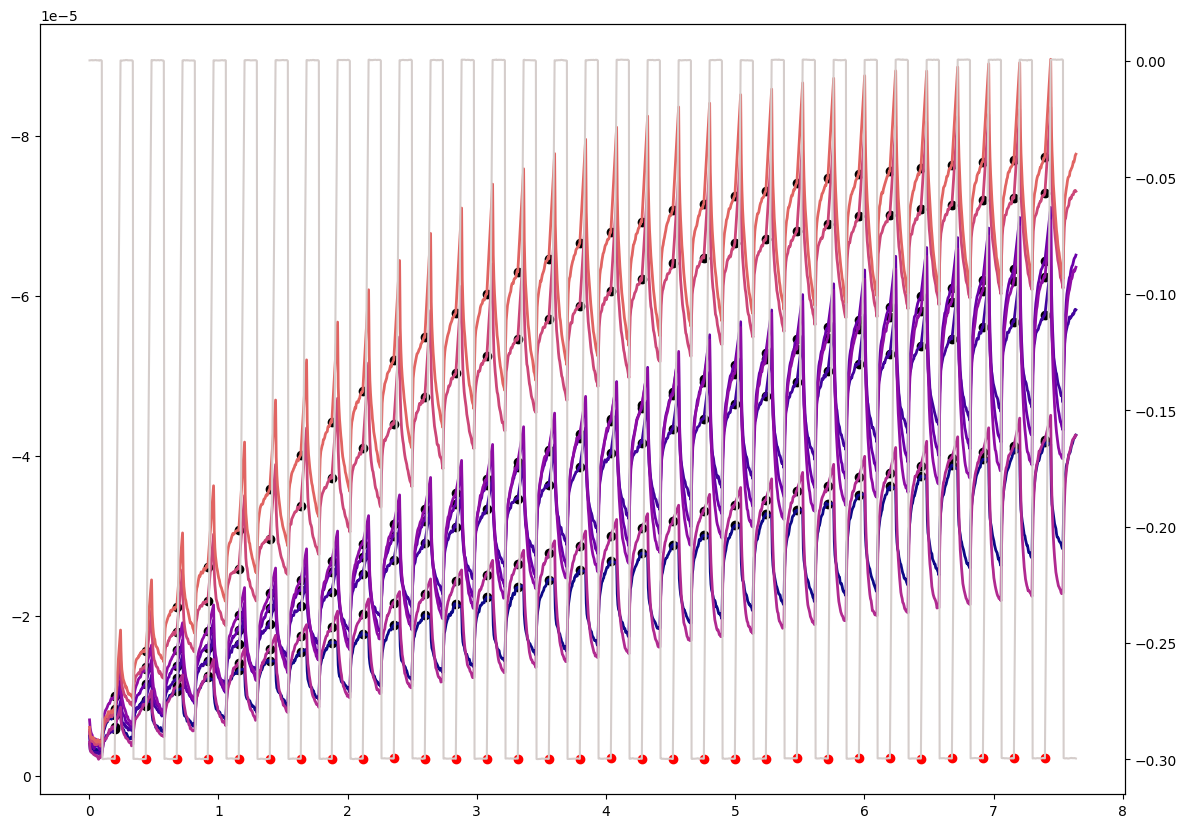

In [157]:
# 同上，只不过改成LGP读取
# 处理s4c2的电导更新数据（提取NGP），首先确定每一次的G0，然后计算更新的幅度，并提供百分比
# 电流转换为电导，单位先采用S（but too big）
# 读取数据
pulse = [20,40,60,70,80,90,120]
# pulse = [20,80,120]
dfs = [pd.read_excel(f"A:\\project\\OECT\\b1500a\\2024_4_24\\width\\{i}ms.xlsx") for i in pulse]
r=1
all = len(dfs[0]) 
x1 = dfs[0].iloc[13:int(r*all),1].tolist()
y1 = dfs[0].iloc[13:int(r*all),2].tolist()
Is = [df.iloc[13:int(r*all),3].tolist() for df in dfs]
# 找到NGP结束的点
def get_endNGP(v):
    new_idx = []
    for i in range(1,len(v)-1):
        if v[i-1] < -0.2 and v[i+1] > -0.2 and v[i] < -0.2:
            new_idx.append(i)
    return new_idx
new_idx = get_endNGP(y1)   
# plot
colors = cm.get_cmap('plasma')
fig, ax1 = plt.subplots(figsize=(14, 10))
ax2 = ax1.twinx()
ax2.plot(x1, y1, color = '#D5CDCB')
ax2.scatter([x1[i] for i in new_idx], [y1[i] for i in new_idx], color='red')
states = []
for i in range(len(pulse)):
    ax1.plot(x1, Is[i], color = colors(0.1*i), linewidth=2)
    ax1.invert_yaxis()
    # plot NGP end
    ax1.scatter([x1[t] for t in new_idx], [Is[i][t] for t in new_idx], color='black', marker='o')
    # save the 32 states conducdance
    states.append([Is[i][t] for t in new_idx])

plt.show()
df_states = pd.DataFrame()
for i in range(len(pulse)):
    df_states[f'{pulse[i]}ms'] = states[i]
# df_states.to_csv('./s4c2_states2_in_diff_pulse.csv')

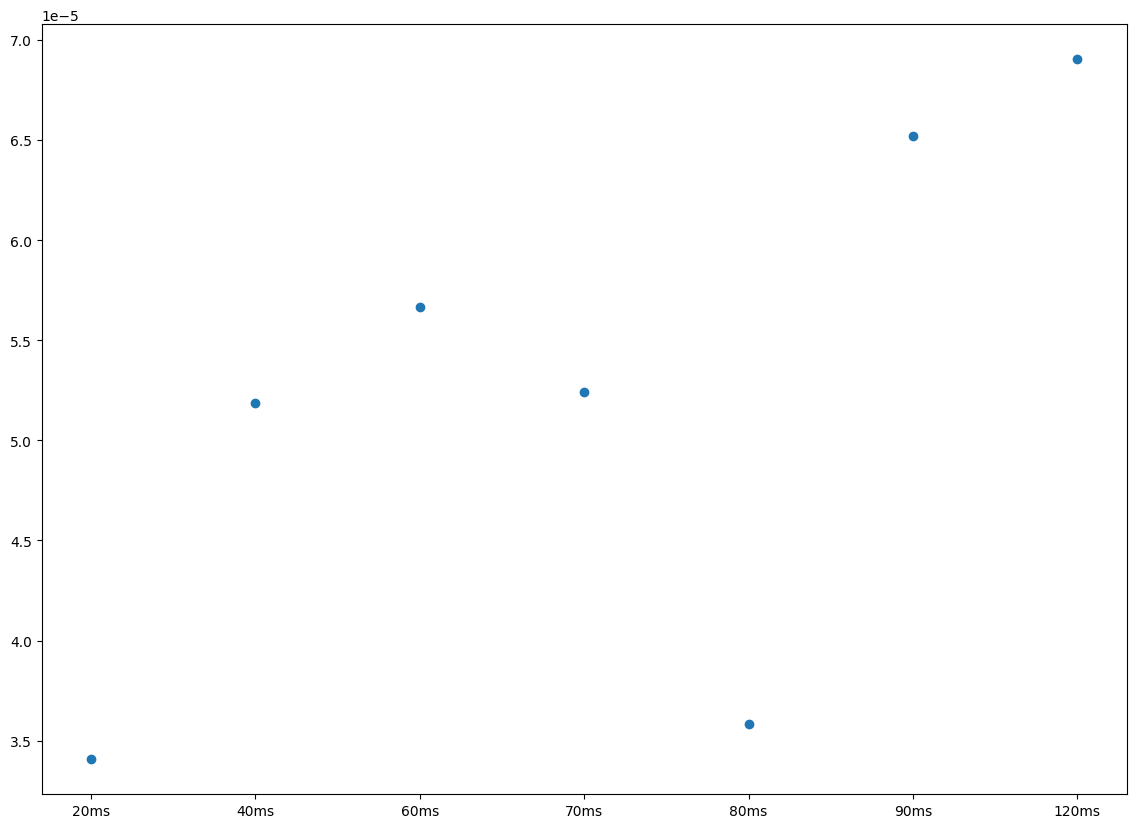

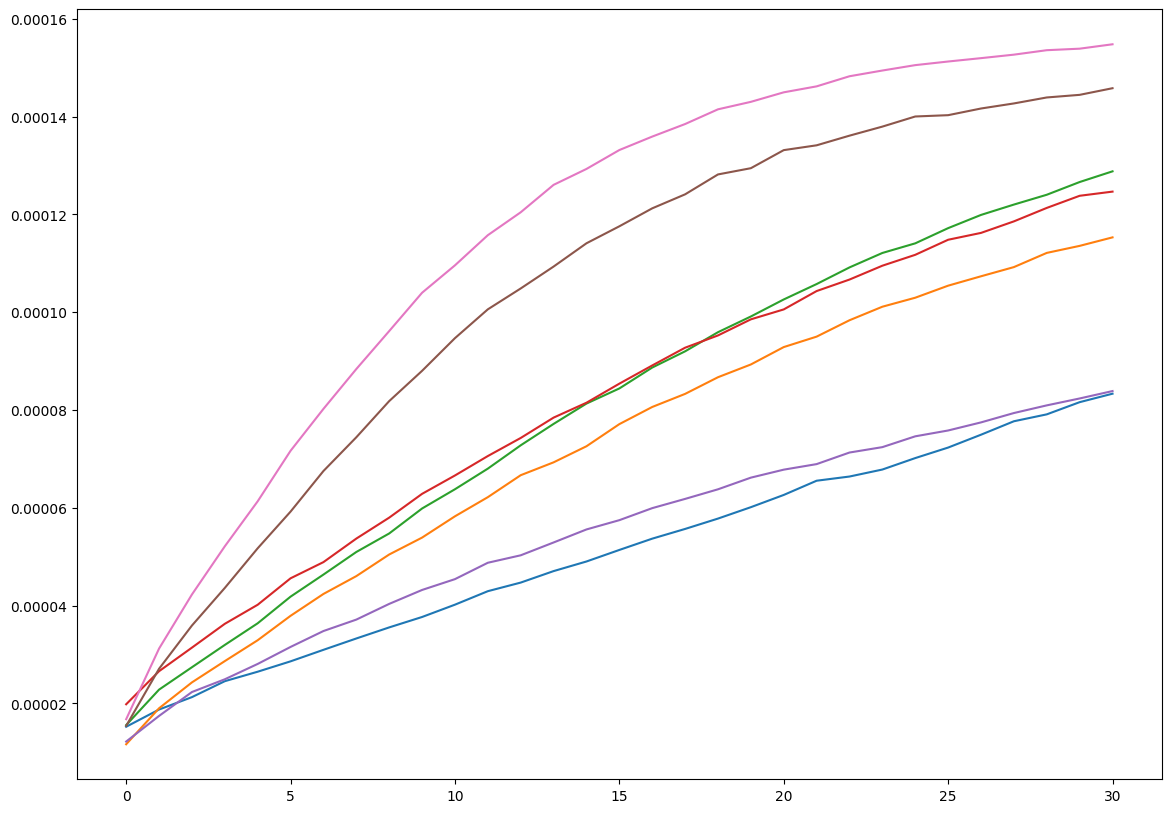

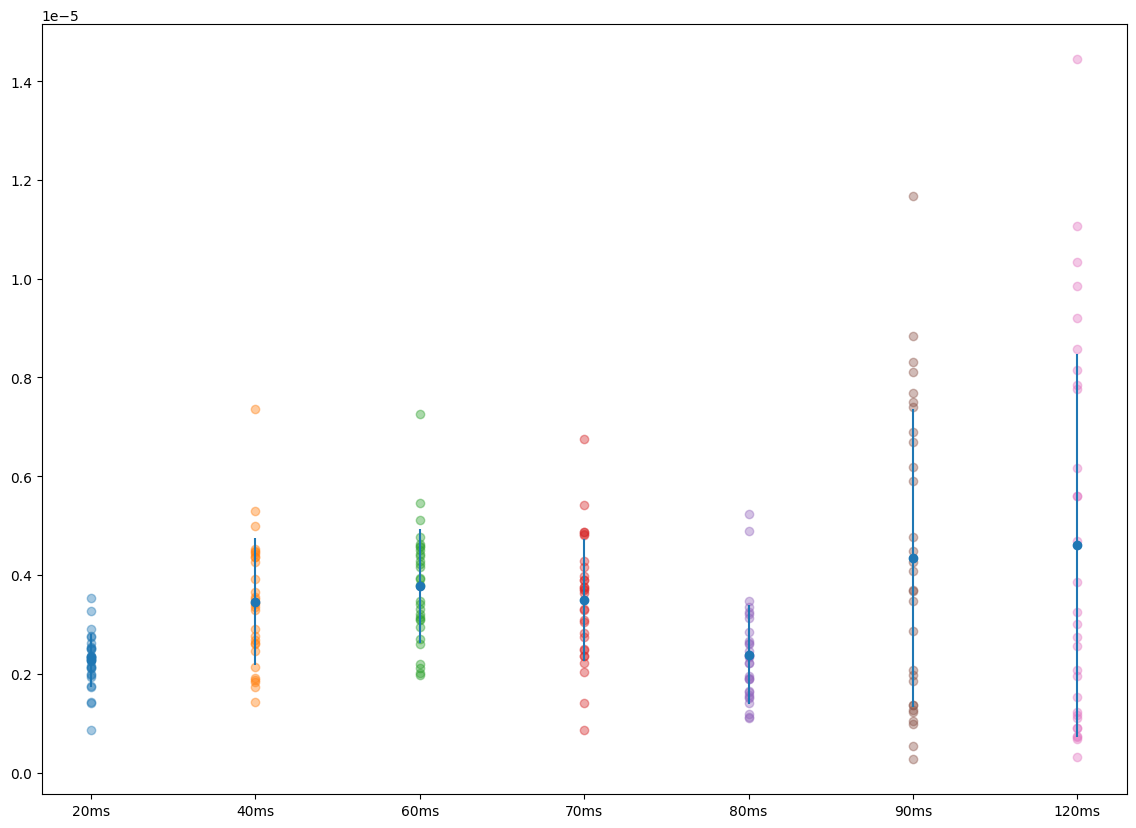

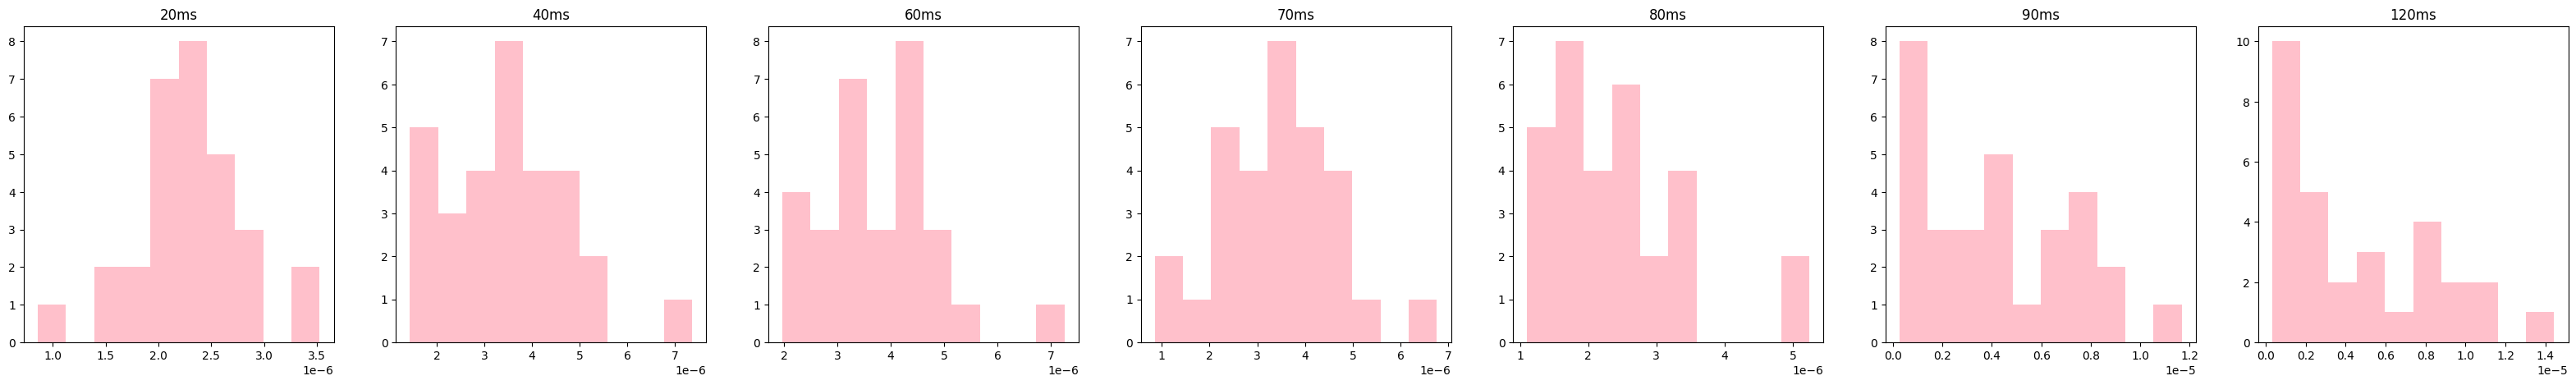

In [16]:
# 对上一个处理完的数据进行进一步处理并绘制图像
states = pd.read_csv('./s4c2_states2_in_diff_pulse.csv')
states = states.drop(columns=['Unnamed: 0'])
plt.figure(figsize=(14, 10))
ranges = states.max() - states.min()
plt.errorbar(x=states.columns, y=ranges, fmt='o')
# 每一个数据都除以-0.5, 高精度计算
states = states / -0.5
# 计算每次的增加量
states_diff = states.diff()
# 计算每次的增加量占该列初始值的百分比
states_diff_percnet = states_diff / states.iloc[0]


plt.figure(figsize=(14, 10))
plt.plot(states)
plt.figure(figsize=(14, 10) )
means = states_diff.mean()
std = states_diff.std()
ranges = states.max() - states.min()
plt.errorbar(x=states.columns, y=means, yerr=std, fmt='o')
for i in states_diff.columns:
    plt.scatter([i]*(states_diff.shape[0]), states_diff[i], alpha=0.4)
fig,ax = plt.subplots(1,len(states_diff.columns), figsize=(40, 5))
for i in range(len(states_diff.columns)):
    ax[i].hist(states_diff.iloc[:,i], bins=10, color = 'pink')
    ax[i].set_title(f'{states_diff.columns[i]}')

<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
C:\Users\cmx\AppData\Local\Temp\ipykernel_33204\1513080329.py:16: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_excel('A:\\project\OECT\\b1500a\\2024_4_19\\on_off_test_25k_cycles.xlsx')
C:\Users\cmx\AppData\Local\Temp\ipykernel_33204\1513080329.py:49: RankWarning: Polyfit may be poorly conditioned
  polynomial = np.poly1d(np.polyfit(new_x, y2[s1:e1], 100))
C:\Users\cmx\AppData\Local\Temp\ipykernel_33204\1513080329.py:52: OptimizeWarning: Covariance of the parameters could not be estimated
  tau, pco = curve_fit(func, new_x, y2[s1:e1])


[0.0022, 1]


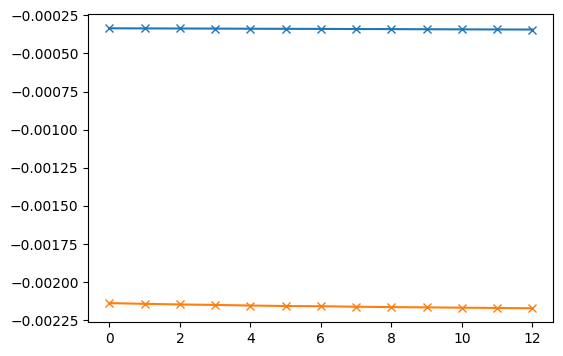

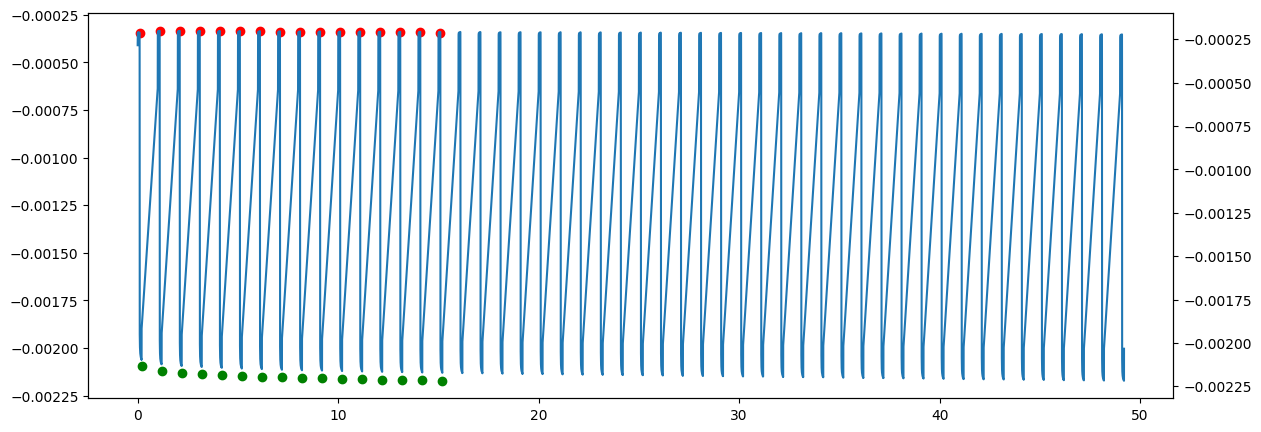

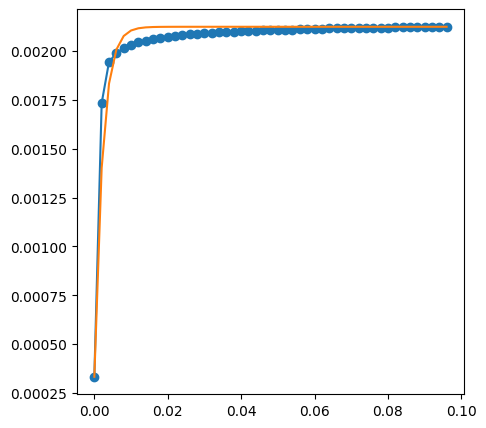

In [153]:
# 拟合开关时间
# i(t) = i_sat + i_diff * exp(-t/tau)
from scipy.signal import find_peaks
def get_endNGP(v):
    new_idx = []
    for i in range(1,len(v)-1):
        if v[i-1] < -0.4 and v[i+1] > -0.4 and v[i] < -0.4:
            new_idx.append(i)
    return new_idx
def get_startNGP(v):
    new_idx = []
    for i in range(1,len(v)-1):
        if v[i-1] > -0.4 and v[i+1] < -0.4 and v[i] > -0.4:
            new_idx.append(i)
    return new_idx
df = pd.read_excel('A:\\project\OECT\\b1500a\\2024_4_19\\on_off_test_25k_cycles.xlsx')
x1 = df.iloc[13:,1].tolist()
y1 = df.iloc[13:,2].tolist()
y2 = df.iloc[13:,3].tolist()
start = get_startNGP(y1)   
end = get_endNGP(y1)
peaks,_ = find_peaks(y2)
# 存储一下LGP结束时的电流和NGP结束时的电流（前3个点不要）
i_lgp = [y2[i] for i in start[3:]]
i_hgp = [y2[i] for i in end[3:]]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(i_lgp, marker='x')
ax.plot(i_hgp, marker='x')

# plot 时间常数插值
fig, ax1 = plt.subplots(figsize=(14, 5))
ax2 = ax1.twinx()
ax2.plot(x1,y2)
# ax1.scatter([x1[i] for i in peaks], [y2[i] for i in peaks], color='red')
ax1.scatter([x1[i] for i in start], [y2[i] for i in start], color='red')
ax1.scatter([x1[i] for i in end], [y2[i] for i in end], color='green')
# 拟合第一段开启  i(t) = i_sat + i_diff * exp(-t/tau)
from scipy.optimize import curve_fit
new_x = x1[start[0]:end[0]]
new_x = [i - new_x[0] for i in new_x]
y2 = [-i for i in y2]
s1, e1 = start[1], end[1]
i_diff = y2[e1] - y2[s1]
plt.figure(figsize=(5, 5))
plt.plot(new_x, y2[s1:e1], marker='o')
def func(t, tau,k):
    return y2[e1] - i_diff *np.exp(-t/tau)
# 多项式插值y
polynomial = np.poly1d(np.polyfit(new_x, y2[s1:e1], 100))
# x_help = np.linspace(0,0.08,1000)
# y_help = polynomial(x_help)
tau, pco = curve_fit(func, new_x, y2[s1:e1])
# tau, pco = curve_fit(func, x_help, y_help)
tau = [0.0022, 1]
y_fit = [func(i, *tau) for i in new_x]
plt.plot(new_x, y_fit)
print(tau)

<>:17: SyntaxWarning: invalid escape sequence '\O'
<>:17: SyntaxWarning: invalid escape sequence '\O'
C:\Users\cmx\AppData\Local\Temp\ipykernel_33204\3940310011.py:17: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_excel('A:\\project\OECT\\b1500a\\2024_4_19\\on_off_test_25k_cycles.xlsx')


Text(0.5, 1.0, 'LGP Pulse Response')

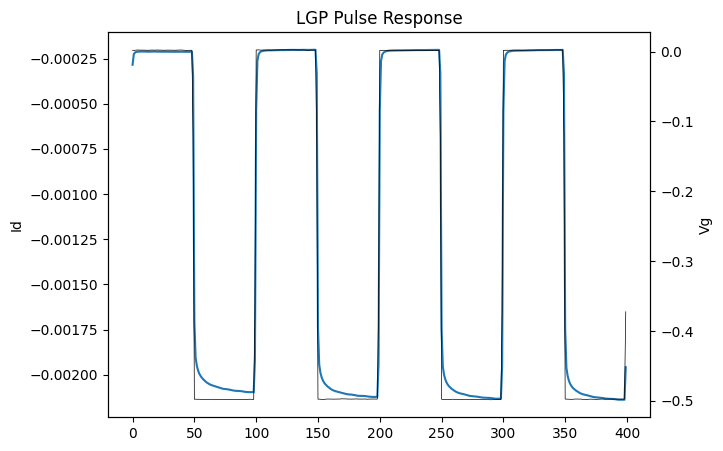

In [175]:
# 绘制单脉冲响应
# 拟合开关时间
# i(t) = i_sat + i_diff * exp(-t/tau)
from scipy.signal import find_peaks
def get_endNGP(v):
    new_idx = []
    for i in range(1,len(v)-1):
        if v[i-1] < -0.4 and v[i+1] > -0.4 and v[i] < -0.4:
            new_idx.append(i)
    return new_idx
def get_startNGP(v):
    new_idx = []
    for i in range(1,len(v)-1):
        if v[i-1] > -0.4 and v[i+1] < -0.4 and v[i] > -0.4:
            new_idx.append(i)
    return new_idx
df = pd.read_excel('A:\\project\OECT\\b1500a\\2024_4_19\\on_off_test_25k_cycles.xlsx')
x1 = df.iloc[13:,1].tolist()
y1 = df.iloc[13:,2].tolist()
y2 = df.iloc[13:,3].tolist()
start = get_startNGP(y1)   
end = get_endNGP(y1)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(y2[:400])
ax.set_ylabel('Id')
ax2 = ax.twinx()
ax2.plot(y1[:400], color='black', linewidth=0.5)
ax2.set_ylabel('Vg', color='black')
# 标题设置
ax.set_title('LGP Pulse Response')